In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 1. return

In [2]:
# INSTRUCTION:
# change itv to generate results for 0.125, 0.25 ...
# change algorithm to either td3 or ppo
#----------------------------------------------------

import glob
# interval = ["point125","point25","point5","point75"]
interval = ["vzero","vpoint1","vpoint3"]

itv = interval[0]
# itv = "one"
algorithm = "ddpg" # "ppo"
visitors = "multi"  # single
network = "64_64_NN" # 300_NN or 64_64_NN or 300_300_NN
# txt_dir = "../SHARCNET/Results/"+visitors + "/" + algorithm + "/" + network+"/new_64batchsize/"+itv+"/"
txt_dir = "../SHARCNET/Results/multi/lazy_visitor_sq_action/new/"+itv+"/"
# txt_dir = "../SHARCNET/Results/single/ddpg/64_64_NN/new/one/"

# pic_dir = "./plots_for_thesis/"+visitors+"/"+algorithm+"/" + network+"/new_64batchsize/"
pic_dir = "./plots_for_thesis/"+visitors+"/lazy_visitor_sq_action/new/"
# pic_dir = "./plots_for_thesis/"+visitors+"/aug_obs/ddpg/new/"
# pic_dir = "./plots_for_thesis/single/ddpg/64_64_NN/new/"
modes = ["SARA","PLA"]
all_data_files = dict()
for mode in modes:
    mode_data_files = glob.glob(txt_dir+mode+ "/**/" +"*.txt", recursive=True)
    mode_data_files.sort()
    print("{}: {} files found".format(mode,len(mode_data_files)))
    for f in mode_data_files:
        print(f)
    all_data_files[mode]=mode_data_files

SARA: 2 files found
../SHARCNET/Results/multi/lazy_visitor_sq_action/new/vzero/SARA\2019-11-14-172743-0-0\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/multi/lazy_visitor_sq_action/new/vzero/SARA\2019-11-14-172743-1-0\ddpg\ddpg_s0\progress.txt
PLA: 3 files found
../SHARCNET/Results/multi/lazy_visitor_sq_action/new/vzero/PLA\2019-11-14-172743-0-0\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/multi/lazy_visitor_sq_action/new/vzero/PLA\2019-11-14-172743-1-0\ddpg\ddpg_s0\progress.txt
../SHARCNET/Results/multi/lazy_visitor_sq_action/new/vzero/PLA\2019-11-14-172743-2-0\ddpg\ddpg_s0\progress.txt


In [3]:
txt_dir

'../SHARCNET/Results/multi/lazy_visitor_sq_action/new/vzero/'

In [4]:
all_combined_data = dict()
if algorithm == "ppo":
    metrics = ["AverageEpRet", "AverageVVals"]
    col_names = ["return", "V_means"]
elif algorithm == "ddpg":
    metrics = ["AverageEpRet", "AverageQVals"]
    col_names = ["return", "Q_means"]
else:
    metrics = ["AverageEpRet", "AverageQ1Vals", "AverageQ2Vals"]
    col_names = ["return","Q1_means","Q2_means"]
for mode in modes:

    mode_data = []
    for file in all_data_files[mode]:
        mode_data.append(pd.read_csv(file, sep="\t"))
    
    mode_combined_data = pd.DataFrame()
    for metric, col_name in zip(metrics, col_names):
        metric_combined_data = pd.DataFrame()
        for i in range(len(all_data_files[mode])):
            metric_combined_data[col_name+"_run"+str(i)] = mode_data[i][metric]
        metric_combined_data[col_name+"_avg"] = metric_combined_data.mean(axis=1)
        metric_combined_data[col_name+'_std'] = metric_combined_data.std(axis=1)
        
        mode_combined_data = pd.concat([mode_combined_data,metric_combined_data],axis=1)
    all_combined_data[mode] = mode_combined_data

In [5]:
all_combined_data['PLA']

,return_run0,return_run1,return_run2,return_avg,return_std,Q_means_run0,Q_means_run1,Q_means_run2,Q_means_avg,Q_means_std
0,35.924880,26.239492,33.774120,31.979497,4.152685,0.819732,0.701425,0.762203,0.761120,0.048305
1,54.356106,61.793587,63.195770,59.781821,3.879031,1.904413,1.828727,1.836235,1.856458,0.034048
2,63.339120,42.679802,69.749620,58.589514,11.550262,2.247472,1.993349,2.420672,2.220498,0.175493
3,85.390350,46.592888,34.962900,55.648713,21.559807,2.870642,2.303945,2.505812,2.560133,0.234520
4,45.188240,79.808160,36.434960,53.810453,18.727263,2.928323,3.033565,2.597808,2.853232,0.185652
5,57.575500,93.829170,44.875580,65.426750,20.741988,3.390413,3.733630,2.822166,3.315403,0.375865
6,60.450350,93.250180,46.384796,66.695109,19.635662,3.748873,4.508453,3.023688,3.760338,0.606207
7,64.413970,92.852800,48.291480,68.519417,18.422248,4.173551,5.115075,3.364516,4.217714,0.715345
8,59.222763,91.355970,68.909485,73.162739,13.458662,4.479620,5.708769,3.823900,4.670763,0.781275
9,52.289562,93.133570,67.320656,70.914596,16.867040,4.790705,6.158767,4.120461,5.023311,0.848234


save to ./plots_for_thesis/multi/lazy_visitor_sq_action/new/
save to ./plots_for_thesis/multi/lazy_visitor_sq_action/new/


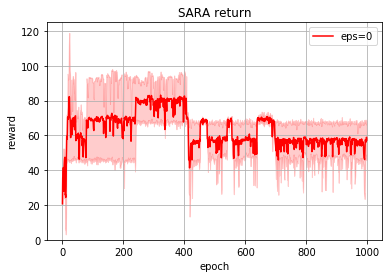

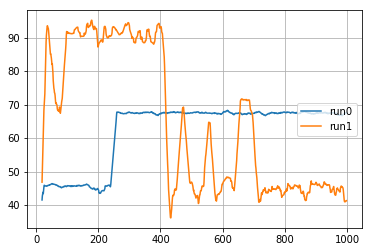

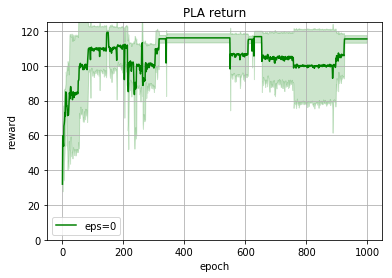

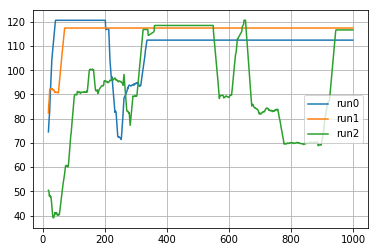

In [6]:
# Plot return
colors = ['r','g','b']
metric = "return"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):

    data = all_combined_data[mode]
    length = data.shape[0]
    if length == 0:
        print("No data from {}".format(mode))
        continue
#     label = "[0, "+itv.replace("point","0.")+"]"
    label = "eps="+itv.replace("vpoint","0.").replace("vzero", "0")
    
    plt.figure()
    plt.grid()
    plt.fill_between(data.index, data[metric+"_avg"] - data[metric+"_std"],
                 data[metric+'_avg'] + data[metric+'_std'], alpha=0.2,
                 color=c)
    plt.plot(data.index, data[metric+'_avg'], '-', color=c,
         label=label)
    plt.legend(loc="best")
    plt.ylim([0,125])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel("reward")
    plt.savefig(pic_dir+"{}_{}_{}.png".format(itv,mode,metric), bbox_inches='tight')
    print("save to {}".format(pic_dir))
    
    plt.figure()
    plt.grid()
    for i in range(len(all_data_files[mode])):
        plt.plot(data.index, data[metric+'_run'+str(i)].rolling(window=20).mean(), '-', label="run"+str(i))
    plt.legend(loc="right")
    plt.savefig(pic_dir+"{}_{}_{}_allrun.png".format(itv,mode,metric), bbox_inches='tight')
    

### 2. V_mean

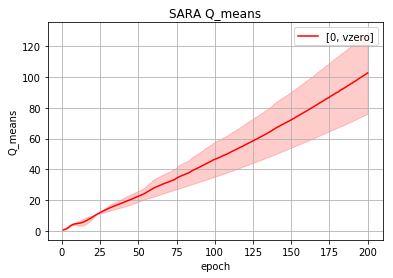

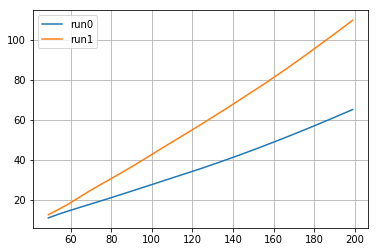

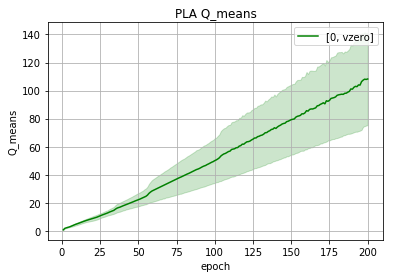

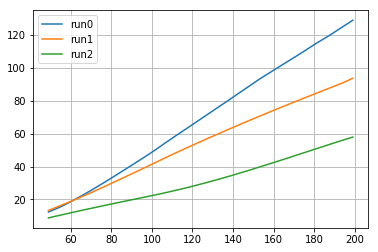

In [7]:
from matplotlib.colors import LogNorm
colors = ['r','g','b']
metric = "Q_means"
modes = ["SARA","PLA"]
for mode, c in zip(modes, colors):

    data = all_combined_data[mode]
    length = data.shape[0]
    if length == 0:
        print("No data from {}".format(mode))
        continue
    label = "[0, "+itv.replace("point","0.")+"]"
    
    plt.figure()
    plt.grid()
    plt.fill_between(np.linspace(1,length,length)[:200], data[metric+"_avg"][:200] - data[metric+"_std"][:200],
                 data[metric+'_avg'][:200] + data[metric+'_std'][:200], alpha=0.2,
                 color=c)
    plt.plot(np.linspace(1,length,length)[:200], data[metric+'_avg'][:200], '-', color=c, label=label)
    plt.legend(loc="best")
#     plt.ylim([0,27])
    plt.title('{} {}'.format(mode,metric))
    plt.xlabel("epoch")
    plt.ylabel(metric)
    plt.savefig(pic_dir+'/{}_{}_{}.png'.format(itv,mode,metric), bbox_inches='tight')
    
    
    plt.figure()
    plt.grid()
    for i in range(0,len(all_data_files[mode])):
        plt.plot(data.index[:200], data[metric+'_run'+str(i)][:200].rolling(window=50).mean(), '-', label="run"+str(i))
    plt.legend(loc="best")

    

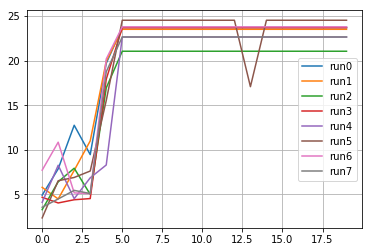

In [90]:
metric="return"
mode="SARA"
plt.figure()
plt.grid()
data = all_combined_data[mode]
for i in range(len(all_data_files[mode])):
    plt.plot(data.index[:20], data[metric+'_run'+str(i)][:20].rolling(window=1).mean(), '-', label="run"+str(i))
plt.legend(loc="right")